In [1]:
# Created by Nadhifa Sofia
# Data Science Mid Test

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Read Twitter Dataset 

In [2]:
# Because this' my Mid Test, My lecturer sent us the dataset from twitter and I used it
tweets = pd.read_csv("data/gojek_twitter_dataset.csv", delimiter=',')
tweets.head()

,tweet,sentimen
0,Saya juga mau vouchee @gojekindonesia https:/...,1
1,download gojek duluuu uwuwu,1
2,Aminnn...#orderan goride mhn di lancar kan.all...,1
3,Tq @gojekindonesia @golifeindonesia 🖤. Harusny...,1
4,Semoga Twitter panjang umur. Berkomunikasi den...,1


In [3]:
tweets.shape

(4000, 2)

# Read Stopword List

In [4]:
def get_stop_word_list(stop_word_list_filename):
    stop_words = ['AT_USER', 'URL']
    fp = open(stop_word_list_filename, 'r')
    for line in fp.readlines():
        word = line.strip() 
        if word == "":
            continue
        stop_words.append(word)
    return stop_words

# Examples are using Bahasa Indonesia
stopwords = get_stop_word_list('data/feature_list/stopwordsID.txt')
stopwords[:10]

['AT_USER',
 'URL',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan']

# Tweet Preprocessing

In [5]:
def process_tweet(twt):
    # Convert to lower case
    twt = twt.lower()
    # Convert www.* or https?://* to URL
    twt = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'URL', twt)
    # Convert @username to AT_USER
    twt = re.sub('@\S+', 'AT_USER', twt)
    # Remove additional white spaces
    twt = re.sub('\s', ' ', twt)
    # Replace all except alphanumeric, _ and space
    twt = re.sub('[^a-zA-Z0-9_ ]', '', twt)
    # trim
    twt = twt.strip()
    return twt

def process_label(label):
    if label == 1:
        return 1.0
    else:
        return 0.0

tweets["process_tweet"] = tweets["tweet"].apply(process_tweet)
tweets["process_label"] = tweets["sentimen"].apply(process_label)
tweets.head()

,tweet,sentimen,process_tweet,process_label
0,Saya juga mau vouchee @gojekindonesia https:/...,1,saya juga mau vouchee AT_USER URL,1.0
1,download gojek duluuu uwuwu,1,download gojek duluuu uwuwu,1.0
2,Aminnn...#orderan goride mhn di lancar kan.all...,1,aminnnorderan goride mhn di lancar kanall driv...,1.0
3,Tq @gojekindonesia @golifeindonesia 🖤. Harusny...,1,tq AT_USER AT_USER harusnya si bapak ini 50 ...,1.0
4,Semoga Twitter panjang umur. Berkomunikasi den...,1,semoga twitter panjang umur berkomunikasi deng...,1.0


# Create Matrix using TF-IDF Weighting

In [6]:
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(tweets["process_tweet"]).toarray()
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split Training and Testing Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    tweets["process_label"], 
                                                    test_size=0.33, 
                                                    random_state=42)

# Train Machine Learning Model

In [8]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Check Accuration against Test Set

In [9]:
predicts = model.predict(X_test)
accuracy_score(y_test, predicts)

0.7553030303030303

# Check Accuration against Test Set

In [11]:
test_data = "Baru pesan gofood tapi rasanya tidak enak :("
test_data = process_tweet(test_data)
test_data = vectorizer.transform((test_data, )).toarray()
predict = model.predict(test_data)
if predict == 0.:
    print("negatif")
else:
    print("positif")

negatif


# Create Confusion Matrix

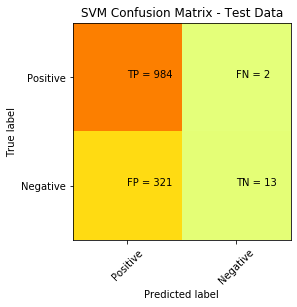

In [54]:
# Create Confusion Matrix

model = SVC(kernel='rbf', random_state=0)
model.fit(X_train, y_train)

predicts = model.predict(X_test)

cm = confusion_matrix(y_test, predicts)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positive','Negative']
plt.title('SVM Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [55]:
#accuracy = s('TP' + 'TN')/('TP' + 'FN' + 'FP' + 'TN')
TP = 984
FN = 2
FP = 321
TN = 13
total = TP + FN + FP + TN

print(total)

1320


# Conclusion

In [56]:
# Accuracy
accuracy = (TP + TN) / (TP + FN + FP + TN)
print('The accuracy of this model:',accuracy)

The accuracy of this model: 0.7553030303030303


In [57]:
# Misprediction Rate
mispredict = (FP + FN) / (TP + FN + FP + TN)
print('The mispredict rate of this model:',mispredict)

The mispredict rate of this model: 0.2446969696969697


In [58]:
# Recall (Positive)
rp = FP / (TP + FN)
print('The recall positive rate of this model:',rp)

The recall positive rate of this model: 0.3255578093306288


In [59]:
# Recall (Negative)
rn = TN / (FP + TN)
print('The recall positive rate of this model:',rn)

The recall positive rate of this model: 0.038922155688622756


In [60]:
# Precision (Positive)
pp = TP / (TP + FP)
print('The precision positive rate of this model:',pp)

The precision positive rate of this model: 0.7540229885057471


In [61]:
# Precision (Negative)
pn = TN / (FN + TN)
print('The precision positive rate of this model:',pn)

The precision positive rate of this model: 0.8666666666666667
